# Import packages

In [1]:
import pandas as pd
import ml_help
from sklearn.model_selection import train_test_split
plot_label="speed (km/h)"

# Load and prepare data

In [2]:
flow_df = pd.read_csv("./data/yonge_flow.csv.zip")
weather_df = pd.read_csv("./data/weather_data.csv.zip")

In [3]:
flow_df["collectedAt"] = pd.to_datetime(flow_df["collectedAt"],utc=True)
weather_df["collectedAt"] = pd.to_datetime(weather_df["collectedAt"],utc=True)

In [4]:
flow_df.drop(['month', 'day', 'day_of_week', 'hour', 'minute'],inplace=True,axis=1)
weather_df.drop(['month', 'day', 'day_of_week', 'day_of_week_name', 'hour', 'minute', 'windDegree'],inplace=True,axis=1)

## Merge flow and weather sets

In [5]:
df = flow_df.merge(weather_df,on="collectedAt",how="inner")
df.head()

,collectedAt,currentSpeed,visibility,temperature,FeelsLike,humidity,windSpeed,cloudsAll,rain1h,snow1h,cloudy,clear,atmosphere,snowy,rainy
0,2022-07-14 12:45:00+00:00,10,10.0,18.69,18.68,79,2.57,0,0.0,0.0,0,1,0,0,0
1,2022-07-14 12:51:44+00:00,13,10.0,19.16,19.17,78,2.57,0,0.0,0.0,0,1,0,0,0
2,2022-07-14 12:55:27+00:00,18,10.0,19.16,19.17,78,2.57,0,0.0,0.0,0,1,0,0,0
3,2022-07-14 13:00:00+00:00,13,10.0,19.38,19.36,76,2.57,0,0.0,0.0,0,1,0,0,0
4,2022-07-14 13:05:00+00:00,14,10.0,19.42,19.40,76,2.57,0,0.0,0.0,0,1,0,0,0


## Extract data from collectedAt

In [6]:
df["month"] = df.collectedAt.dt.month
df["day_of_week"] = df.collectedAt.dt.weekday
df["hour"] = df.collectedAt.dt.hour
df["minute"] = df.collectedAt.dt.minute
df.drop("collectedAt",inplace=True,axis=1)
df.head()

,currentSpeed,visibility,temperature,FeelsLike,humidity,windSpeed,cloudsAll,rain1h,snow1h,cloudy,clear,atmosphere,snowy,rainy,month,day,day_of_week,hour,minute
0,10,10.0,18.69,18.68,79,2.57,0,0.0,0.0,0,1,0,0,0,7,14,3,12,45
1,13,10.0,19.16,19.17,78,2.57,0,0.0,0.0,0,1,0,0,0,7,14,3,12,51
2,18,10.0,19.16,19.17,78,2.57,0,0.0,0.0,0,1,0,0,0,7,14,3,12,55
3,13,10.0,19.38,19.36,76,2.57,0,0.0,0.0,0,1,0,0,0,7,14,3,13,0
4,14,10.0,19.42,19.40,76,2.57,0,0.0,0.0,0,1,0,0,0,7,14,3,13,5


In [7]:
categorical_attrs = ["month", "day_of_week"]

transformed_df = pd.get_dummies(df, columns=categorical_attrs)
transformed_df = transformed_df.astype("float32")
transformed_df.head()

,currentSpeed,visibility,temperature,FeelsLike,humidity,windSpeed,cloudsAll,rain1h,snow1h,cloudy,...,month_10,month_11,month_12,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,10.0,10.0,18.690001,18.680000,79.0,2.57,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,13.0,10.0,19.160000,19.170000,78.0,2.57,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,18.0,10.0,19.160000,19.170000,78.0,2.57,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,13.0,10.0,19.379999,19.360001,76.0,2.57,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,14.0,10.0,19.420000,19.400000,76.0,2.57,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Split data set into train and test

In [8]:
X = transformed_df.drop("currentSpeed",axis=1)
y = transformed_df["currentSpeed"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

## Sample 50% of remaining training data to run CV.
- The idea is have enough data that is representative of the dataset, while speeding up the CV performed by GridSearchCV.

In [9]:
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

# Show model metrics to determine what algorithms to run

In [10]:
metrics = pd.read_csv("./metrics/062_initial_metrics.csv.zip")
metrics

,model,r2,mae,mse,rmse,mape,time_to_fit,time_to_predict
0,Random Forest,0.552150,1.621911,5.236644,2.288372,8.101441e+12,4.236180,0.288012
1,XGBoost,0.522016,1.744282,5.588999,2.364106,2.907844e+13,0.413863,0.021875
2,MLP,0.449016,1.932200,6.442574,2.538223,5.492140e+13,42.414887,0.016816
3,Decision Tree,0.256543,1.742980,8.693139,2.948413,1.332652e-01,0.363392,0.009921
4,Linear Regression,0.133799,2.592713,10.128363,3.182509,1.228731e+14,0.589042,0.018273
5,Elastic Net,0.074116,2.927086,10.826233,3.290324,1.217387e+14,0.042935,0.017769
6,Lasso,0.031607,3.020139,11.323288,3.365009,1.222283e+14,0.084622,0.018144
7,Logistic Regression,-0.492817,2.506357,17.455294,4.177953,9.370378e+13,0.162031,0.015694


# Run ML tasks

## Random Forest

Best params for Random Forest already found!
Fitting model...
Fitting model... OK! Took 24.388342142105103 seconds

model Random Forest
r2 0.4770528056765817
mae 1.874806694817647
mse 6.274662559526953
rmse 2.5049276555475517
mape 26098114405186.12
time_to_fit 24.388342142105103
time_to_predict 0.1435871124267578

Dumping model...
Dumping model... OK! Took 0.5614995956420898 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


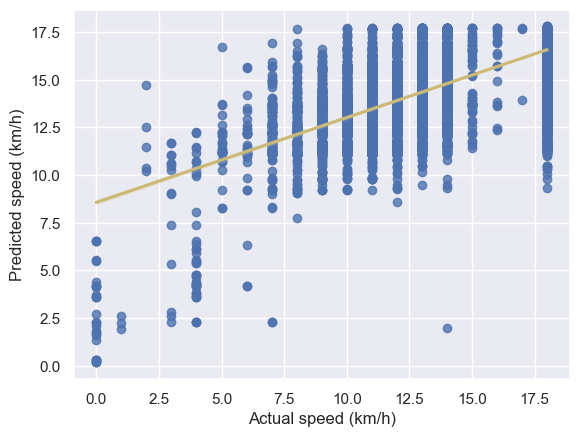

In [11]:
from sklearn.ensemble import RandomForestRegressor

file_name = "063_random_forest"
model_name = "Random Forest"

param_grid = {
    "n_estimators": [100,200,300],
    "max_depth": [16,32,48],
    "max_leaf_nodes": [10,50,100],
    "min_samples_leaf": [1,5,10],
    "min_samples_split": [2,8,16]
}

estimator = RandomForestRegressor()

best_params = ml_help.run_param_search(estimator, param_grid, file_name, model_name, X_train_sample, y_train_sample, verbose=1)
best_params.drop(["score", "model"],axis=1,inplace=True)

params = ml_help.params_to_dict(file_name)

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, RandomForestRegressor(**params), X_train, X_val, y_train, y_val, plot_label, dump_model=True, show_plot=True)
del model_train

## Decision Tree

Best params for Decision Tree already found!
Fitting model...
Fitting model... OK! Took 0.18822669982910156 seconds

model Decision Tree
r2 0.4523936576882628
mae 1.8890283790248952
mse 6.570539149576018
rmse 2.5633062925791794
mape 23269582552221.92
time_to_fit 0.18822669982910156
time_to_predict 0.00400996208190918

Dumping model...
Dumping model... OK! Took 0.00434565544128418 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


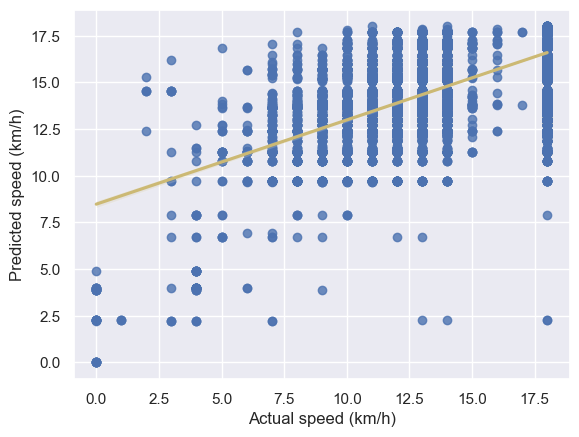

In [12]:
from sklearn.tree import DecisionTreeRegressor

file_name = "063_decision_tree"
model_name = "Decision Tree"

param_grid = {
    "random_state": [42],
    "criterion": ["squared_error"],
    "splitter": ["best"],
    "max_depth": [6,8,16,32,64,128],
    "min_samples_split": [2,4,8,16,32],
    "min_samples_leaf": [1,5,10,15,30],
    "max_leaf_nodes": [10,30,50,75,100]
}

estimator = DecisionTreeRegressor()

best_params = ml_help.run_param_search(estimator, param_grid, file_name, model_name, X_train_sample, y_train_sample, verbose=1)
best_params.drop(["score", "model"],axis=1,inplace=True)

params = ml_help.params_to_dict(file_name)

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, DecisionTreeRegressor(**params), X_train, X_val, y_train, y_val, plot_label, dump_model=True, show_plot=True)
del model_train

## XGBoost

Testing 243 param combinations for XGBoost. CV=5. Total fits: 1215

Searching space...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Searching space... OK! Took 2179.0692121982574 seconds
Storing best params...
Storing best params... OK
Fitting model...
Fitting model... OK! Took 3.3769896030426025 seconds

model XGBoost
r2 0.5321020709798304
mae 1.7439139
mse 5.6141453
rmse 2.3694189
mape 33385018000000.0
time_to_fit 3.3769896030426025
time_to_predict 0.05739545822143555

Dumping model...
Dumping model... OK! Took 0.13971781730651855 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


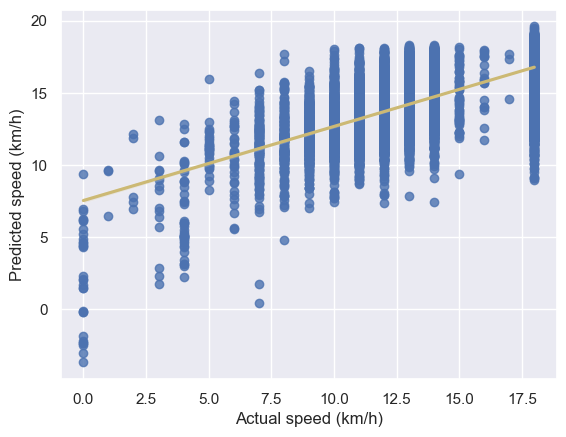

In [14]:
import xgboost as xgb

file_name = "063_xgboost"
model_name = "XGBoost"

param_grid = {
    "random_state": [42],
    "objective": ["reg:squarederror"],
    "tree_method": ["hist"],
    "predictor": ["cpu_predictor"],
    "num_parallel_tree": [10],
    "max_depth": [6, 8, 16],
    "n_estimators": [100, 250, 350],
    "max_leaves": [20, 40, 80],
    "alpha": [0.01, 0.1, 1],
    "learning_rate": [0.3, 0.5, 0.9]
}

estimator = xgb.XGBRegressor()

best_params = ml_help.run_param_search(estimator, param_grid, file_name, model_name, X_train_sample, y_train_sample, verbose=1)
best_params.drop(["score", "model"],axis=1,inplace=True)

params = ml_help.params_to_dict(file_name)
    
model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, xgb.XGBRegressor(**params), X_train, X_val, y_train, y_val, plot_label, dump_model=True, show_plot=True)
del model_train

## MLP

Testing 216 param combinations for MLP. CV=5. Total fits: 1080

Searching space...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Searching space... OK! Took 1061.6156628131866 seconds
Storing best params...
Storing best params... OK
Fitting model...


C:\Users\felip\anaconda3\envs\rapids\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting model... OK! Took 69.88843727111816 seconds

model MLP
r2 0.4992796466639158
mae 1.848357
mse 6.0079703
rmse 2.451116
mape 16127137000000.0
time_to_fit 69.88843727111816
time_to_predict 0.016462326049804688

Dumping model...
Dumping model... OK! Took 0.014316320419311523 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


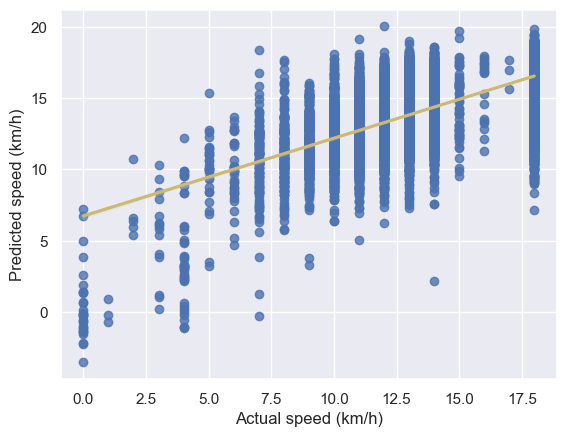

In [15]:
from sklearn.neural_network import MLPRegressor

file_name = "063_mlpr"
model_name = "MLP"

param_grid = {
    "random_state": [42],
    "hidden_layer_sizes": [(100), (100,50), (100,50,25)],
    "alpha": [0.0001, 0.001, 0.1],
    "learning_rate_init": [0.001, 0.1],
    "max_iter": [200, 300, 500],
    "tol": [1e-4],
    "epsilon": [1e-8, 1e-4],
    "n_iter_no_change": [3, 10]
}

estimator = MLPRegressor()

best_params = ml_help.run_param_search(estimator, param_grid, file_name, model_name, X_train_sample, y_train_sample, verbose=1)
best_params.drop(["score", "model"],axis=1,inplace=True)

params = ml_help.params_to_dict(file_name)

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, MLPRegressor(**params), X_train, X_val, y_train, y_val, plot_label, dump_model=True, show_plot=True)
del model_train